In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ConsumerKey = "5Rhf7GTCvDUVqfOAE6G7zh2T3"
ConsumerSecret = "E7jKCkzyF6my0j7VxMYNyLMHyVyxz8H7MJjz4Z6stutaPgZUiS"
AccessToken = "1052018922357047296-r6JApBX81nkMBGje7OCsgu4v3x23uc"
AccessTokenSecret = "fQxVMl8QL9fIQLfyPT92TjTac6dJ4AqkVRj344anBTLWe"

In [3]:
auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
posts = api.user_timeline(screen_name="Telkomsel", count = 1000, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) @pemfitraan Baik, Kak Fitra. Apabila sudah aktifin paketnya, Kakak bisa akses layanan Disney+ Hotstar melalui perangkat seluler atau melalui perangkat Dekstop ya. Tks :) -Kei

2) @21artme Siap, segera meluncur buat cek DM Kakak. Ditunggu yaaa, Makasih :) -Inara

3) @runigoodluck Yah, jadi kehambat ya aktivitasnya. Terkait kendalanya, yuk infoin nomor HP, detail lokasi kejadian, waktu kejadian, dan nomor lain yang berkendala sama jika ada via DM biar Akyl bantu cek lebih lanjut. Tks - Akyl

4) @a__diandra Tenang Kak Diandra, biar jaringannya lancar lagi yuk lgsg aja konfirmasi detailnya ke DM sambil infoin nomor HP, tgl kendala, lokasi (kel,kec,kota) dan nomor Telkomsel lain yg berkendala sama jika ada ya. Tks :) -Garra

5) @itsyouwuff Tenang ya Kak, Rasya bantu cari solusi untuk kendala ga terima SMS kode verifikasi. Infoin ke DM nomor HP, tgl kejadian, sama lokasi detail ya. Sehat selalu :) -Rasya



In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first of Data
df.head() 

,Tweets
0,"@pemfitraan Baik, Kak Fitra. Apabila sudah akt..."
1,"@21artme Siap, segera meluncur buat cek DM Kak..."
2,"@runigoodluck Yah, jadi kehambat ya aktivitasn..."
3,"@a__diandra Tenang Kak Diandra, biar jaringann..."
4,"@itsyouwuff Tenang ya Kak, Rasya bantu cari so..."


In [6]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing Text and Number
  text = re.sub(r'#','', text) #removing Hastag
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlink

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"Baik, Kak Fitra. Apabila sudah aktifin paketn..."
1,"Siap, segera meluncur buat cek DM Kakak. Ditu..."
2,"Yah, jadi kehambat ya aktivitasnya. Terkait k..."
3,"__diandra Tenang Kak Diandra, biar jaringannya..."
4,"Tenang ya Kak, Rasya bantu cari solusi untuk ..."
...,...
195,"Baik, Kak. Kalau kakak mau aktivasi paket pro..."
196,"Duh, jadi keganggu ya Kak aktivitasnya. Yuk i..."
197,"Halo, Kak. Apakah yang dimaksud adalah reakti..."
198,"Siap, Kak. Dhira cek DM Kakak sudah masuk dal..."


In [7]:
# Create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectiviy' & 'Polarity'
df['Subjectiviy'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectiviy,Polarity
0,"Baik, Kak Fitra. Apabila sudah aktifin paketn...",1.000,0.500
1,"Siap, segera meluncur buat cek DM Kakak. Ditu...",1.000,0.500
2,"Yah, jadi kehambat ya aktivitasnya. Terkait k...",0.000,0.000
3,"__diandra Tenang Kak Diandra, biar jaringannya...",1.000,0.500
4,"Tenang ya Kak, Rasya bantu cari solusi untuk ...",1.000,0.500
...,...,...,...
195,"Baik, Kak. Kalau kakak mau aktivasi paket pro...",0.925,0.375
196,"Duh, jadi keganggu ya Kak aktivitasnya. Yuk i...",0.600,-0.300
197,"Halo, Kak. Apakah yang dimaksud adalah reakti...",1.000,0.500
198,"Siap, Kak. Dhira cek DM Kakak sudah masuk dal...",1.000,0.500


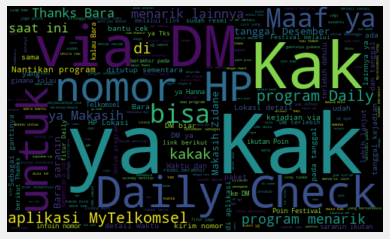

In [8]:
#word cloud visualization
allWords = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectiviy,Polarity,Analysis
0,"Baik, Kak Fitra. Apabila sudah aktifin paketn...",1.000,0.500,positive
1,"Siap, segera meluncur buat cek DM Kakak. Ditu...",1.000,0.500,positive
2,"Yah, jadi kehambat ya aktivitasnya. Terkait k...",0.000,0.000,neutral
3,"__diandra Tenang Kak Diandra, biar jaringannya...",1.000,0.500,positive
4,"Tenang ya Kak, Rasya bantu cari solusi untuk ...",1.000,0.500,positive
...,...,...,...,...
195,"Baik, Kak. Kalau kakak mau aktivasi paket pro...",0.925,0.375,positive
196,"Duh, jadi keganggu ya Kak aktivitasnya. Yuk i...",0.600,-0.300,negative
197,"Halo, Kak. Apakah yang dimaksud adalah reakti...",1.000,0.500,positive
198,"Siap, Kak. Dhira cek DM Kakak sudah masuk dal...",1.000,0.500,positive


In [10]:
print('Negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1)  Maaf ya :( Untuk keluhan harga paket sama kendala akses internet, coba Kakak infoin nomor HP, tanggal kejadian, lokasi (kelurahan, kecamatan, kota) dan nomor Telkomsel lain berkendala sama melalui DM agar dibantu cek dan privasi Kakak tetap terjaga. Tks :) -Darlan

2) _ Siap Kak Ria, cukup doi aja yang ghosting:( Yuk lanjutkan interaksinya via DM ya 😊 -Hanna

3) _mohamad Pasti aktivitas Kak Hanss terganggu ya gara-gara jaringan ga stabil :( Tak perlu khawatir Kak, kasih tau dulu nomor HP, tgl kejadian, lokasi (kel, kec, kota) dan no lain yg berkendala sama via DM agar segera dicek. Ditunggu ya, makasih 😊 -Hanna

4)  Yah jadi terganggu dong main gamenya Kak Dadang :( Coba kasih tau nomor HP, lokasi detail sama tanggal kejadiannya via DM biar dibantuin koneksi internetnya ya :) -Zidane

5) _triawan Yah ga sempet claim ya Kak :( Kemaren ada notif di app MyTelkomsel eerkait penutupan sementara program Daily Check In dan klaim hadiahnya dapat dilakukan maks di tgl 13 D

In [11]:
print('Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1)  Baik, Kak Fitra. Apabila sudah aktifin paketnya, Kakak bisa akses layanan Disney+ Hotstar melalui perangkat seluler atau melalui perangkat Dekstop ya. Tks :) -Kei

2)  Siap, segera meluncur buat cek DM Kakak. Ditunggu yaaa, Makasih :) -Inara

3) __diandra Tenang Kak Diandra, biar jaringannya lancar lagi yuk lgsg aja konfirmasi detailnya ke DM sambil infoin nomor HP, tgl kendala, lokasi (kel,kec,kota) dan nomor Telkomsel lain yg berkendala sama jika ada ya. Tks :) -Garra

4)  Tenang ya Kak, Rasya bantu cari solusi untuk kendala ga terima SMS kode verifikasi. Infoin ke DM nomor HP, tgl kejadian, sama lokasi detail ya. Sehat selalu :) -Rasya

5)  Siap, segera meluncur buat cek DM Kakak. Ditunggu yaaa, Makasih :) -Inara

6)  Kenapa Kak Eno ? Yuk kalo ada kendala atau keluhan langsung aja konfirmasi detailnya ke DM biar bisa dibantu lebih lanjut ya. Tks :) -Garra

7) _Sky___ Sama-sama, Kak Kurniawan. Tetap setia gunain produk Telkomsel ya. Sehat selalu :) -Rasya

8)  H

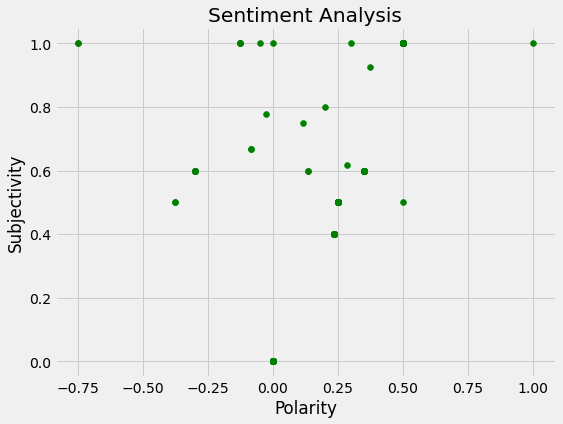

In [12]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectiviy'][i], color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
#persentasepositiv
potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

73.5

In [14]:
#persentasenegatif
netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

9.5

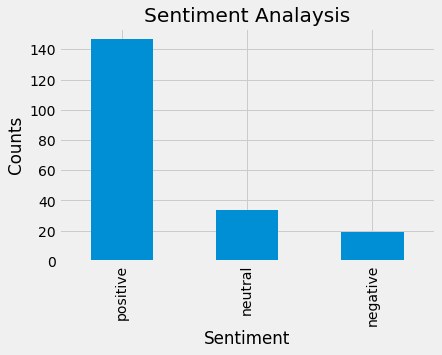

In [15]:
#show value count
df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()